# **Predicting Housing-Prices using Linear Regression in PyTorch**

### Import necessary Libraries

In [23]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load the dataset

In [2]:
data = pd.read_csv("HousingData.csv")

### Handle missing values

In [4]:
data.ffill(inplace=True)

### Split the data into features and target variable

In [14]:
X = data.drop('MEDV', axis=1)  
y = data['MEDV']

### Scale the features

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Convert data to PyTorch tensors

In [29]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):  
        super(LinearRegressionModel, self).__init__()  
        self.linear = nn.Linear(input_size, output_size)  

    def forward(self, x):
        return self.linear(x) 

### Create the model

In [18]:
model = LinearRegressionModel(X_train.shape[1], 1)

In [30]:
model = LinearRegressionModel(X_train.shape[1], 1)

### Define loss function and optimizer

In [31]:
ccriterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [32]:
losses = []
num_epochs = 500
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())  # Store the loss value

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 94.2014
Epoch [100/500], Loss: 32.9008
Epoch [150/500], Loss: 24.4468
Epoch [200/500], Loss: 23.0300
Epoch [250/500], Loss: 22.6502
Epoch [300/500], Loss: 22.4672
Epoch [350/500], Loss: 22.3471
Epoch [400/500], Loss: 22.2601
Epoch [450/500], Loss: 22.1948
Epoch [500/500], Loss: 22.1449


### Plotting the training loss over epochs

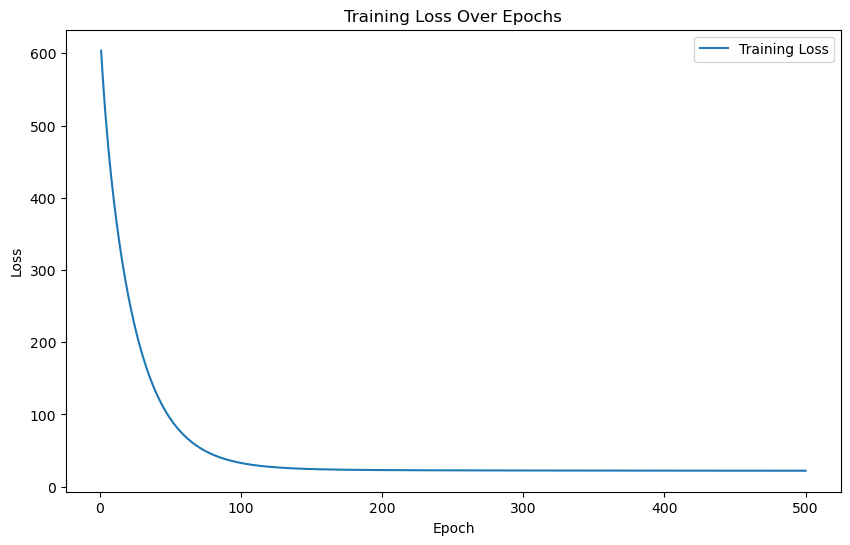

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

### Evaluate on the test set

In [34]:
model.eval() 
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Calculate performance metrics
y_pred_np = y_pred.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()
mse = mean_squared_error(y_test_np, y_pred_np)
mae = mean_absolute_error(y_test_np, y_pred_np)
r2 = r2_score(y_test_np, y_pred_np)
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Test Loss: 25.4758
MSE: 25.4758
MAE: 3.2057
R-squared: 0.6526


### Plot predicted vs actual values

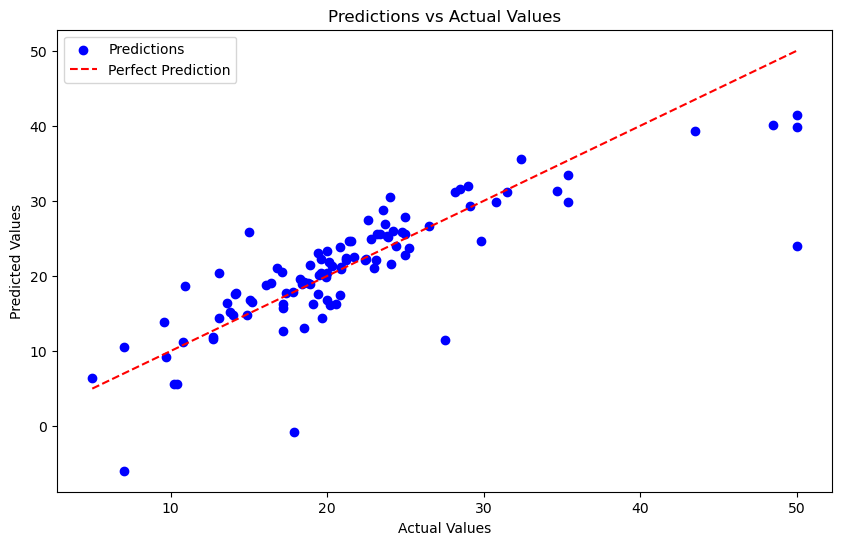

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Predictions')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()